In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the dataset
df = pd.read_csv("amazon_prime_data.csv")

In [31]:
df.shape

(9668, 12)

In [32]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,30-Mar-21,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,30-Mar-21,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,30-Mar-21,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,30-Mar-21,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [34]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [35]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [36]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,9668,9668,9668,7585,8435,672,155,9668.000000,9331,9668,9668,9668
unique,9668,2,9668,5773,7927,86,84,NaN,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,30-Mar-21,NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.341849,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.922482,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [37]:
df.describe(include ="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,9668,9668,9668,7585,8435,672,155,9331,9668,9668,9668
unique,9668,2,9668,5773,7927,86,84,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,30-Mar-21,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,2117,1342,986,15


In [38]:
# Handle missing values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


In [39]:
# Check for duplicate values
df.duplicated().sum()

0

In [40]:
# Filling missing values using fillna()
object_features=df.select_dtypes('object').columns
for feature in df.columns:
    if feature in object_features:
        df[feature]=df[feature].fillna('Not Available')


In [41]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [42]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,9668,9668,9668,9668,9668,9668,9668,9668.000000,9668,9668,9668,9668
unique,9668,2,9668,5773,7928,87,85,NaN,25,219,518,9414
top,s1,Movie,The Grand Seduction,Not Available,Not Available,Not Available,Not Available,NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,2086,1233,8996,9513,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.341849,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.922482,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Distribution of content across Movies & TV Shows on Amazon Prime

C:\Users\rashm\AppData\Local\Temp\ipykernel_16732\2375188428.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


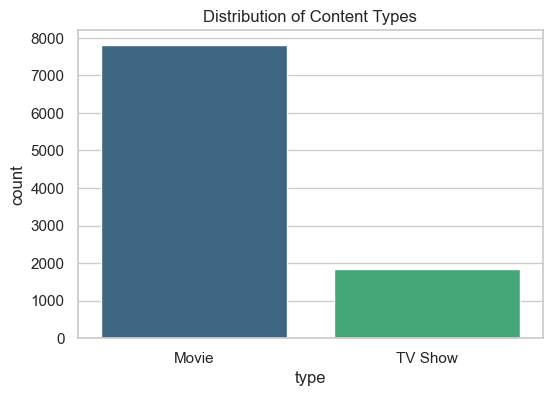

In [113]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(6, 4))

# Create a count plot using Seaborn
sns.countplot(x='type', data=df, palette='viridis')

# Adding title
plt.title('Distribution of Content Types')

# Show the plot
plt.show()

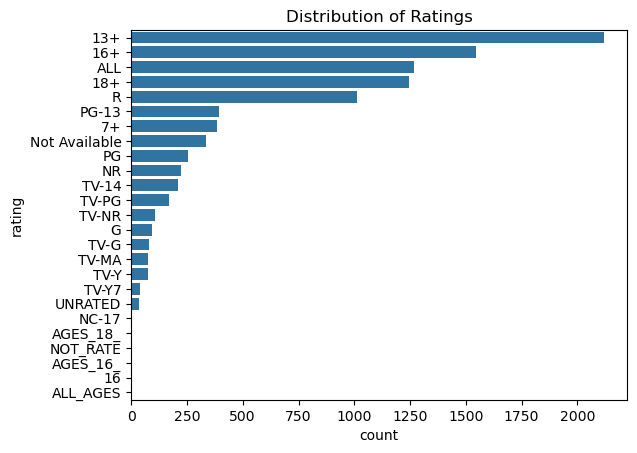

In [44]:
# Distribution of ratings
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

C:\Users\rashm\AppData\Local\Temp\ipykernel_16732\137208739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='country', data=country_content_df, palette='viridis')


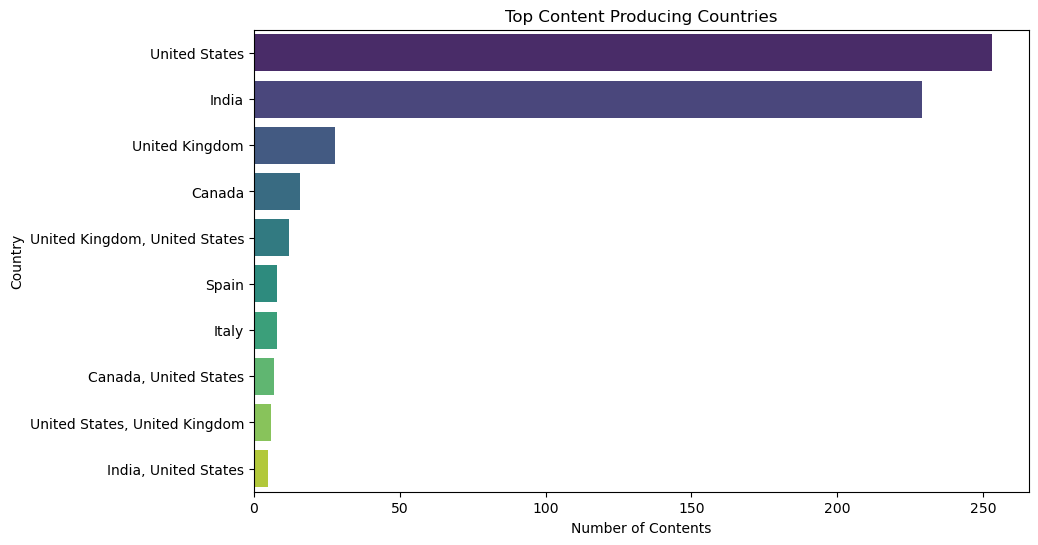

In [45]:
# Filtering out 'Not Available' data
df_filtered = df[df['country'] != 'Not Available']
# Counting occurrences of each country
country_content = df_filtered['country'].value_counts().head(10)

# Convert to DataFrame for easier plotting
country_content_df = country_content.reset_index()
country_content_df.columns = ['country', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='country', data=country_content_df, palette='viridis')
plt.title('Top Content Producing Countries')
plt.xlabel('Number of Contents')
plt.ylabel('Country')
plt.show()

In [46]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries With Most Films on Amazon Prime')
plt.xlabel('Country')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

NameError: name 'top_10_countries' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
df['rating'].value_counts()

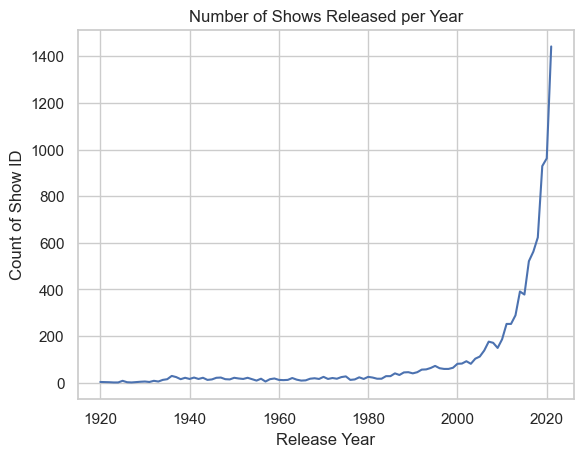

In [128]:
df.groupby('release_year').count()['show_id'].plot(kind='line')
# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Count of Show ID')
plt.title('Number of Shows Released per Year')
plt.show()

In [ ]:
# Trying to clean duration column as it has two entries min & season/seasons
df['duration'].unique()

In [ ]:
df['duration']=df['duration'].str.replace('Seasons','Season')

In [ ]:
df['duration'].unique()

Analyzing Data

In [ ]:
df['director'].unique()

In [ ]:
df['director'].value_counts()

In [ ]:
df.groupby('country').count()['show_id'].nlargest(10).sort_values().plot(kind='barh')

In [ ]:
sns.kdeplot(x='release_year',data=df,fill =True,color="blue")

In [61]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
     
comment_words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in df.description:
     val = str(val)
     tokens = val.split()
     for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     comment_words += " ".join(tokens)+" "
 


In [81]:
wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 5).generate(comment_words)

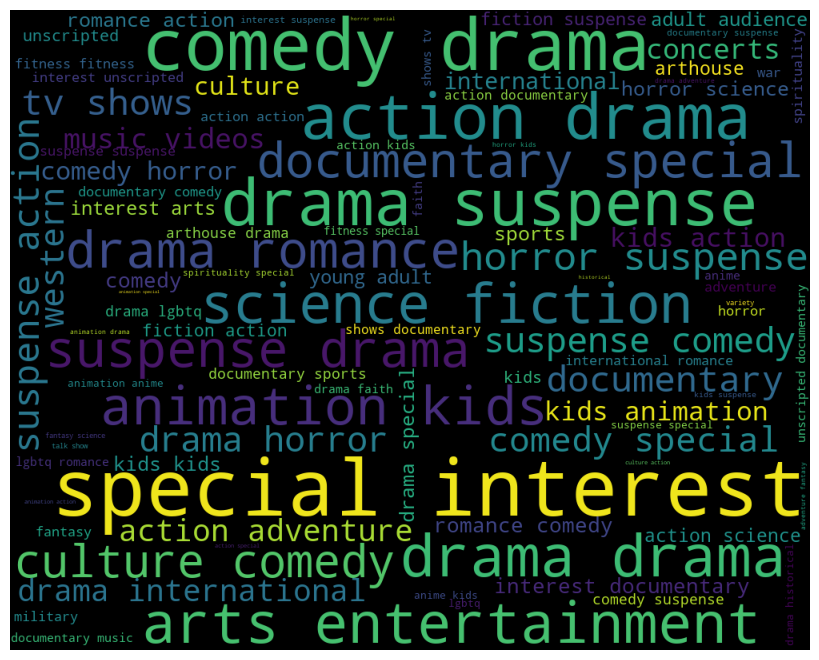

In [83]:
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [73]:
comment_words=" "

df.listed_in

0                 Comedy, Drama
1          Drama, International
2       Action, Drama, Suspense
3                   Documentary
4                Drama, Fantasy
                 ...           
9663                     Comedy
9664                   TV Shows
9665                     Action
9666              Drama, Sports
9667    Action, Drama, Suspense
Name: listed_in, Length: 9668, dtype: object

In [75]:
for val in df.listed_in:
  val=str(val)
  tokens=str.split(val)
  for i in range(0,len(tokens)):
    tokens[i]=tokens[i].lower()

  comment_words=comment_words+" ".join(tokens)+" "

In [77]:
wordcloud=WordCloud(stopwords=stopwords,background_color="black",colormap="Set3",width=1000,height=800,collocations=False).generate(comment_words)
     

(-0.5, 999.5, 799.5, -0.5)

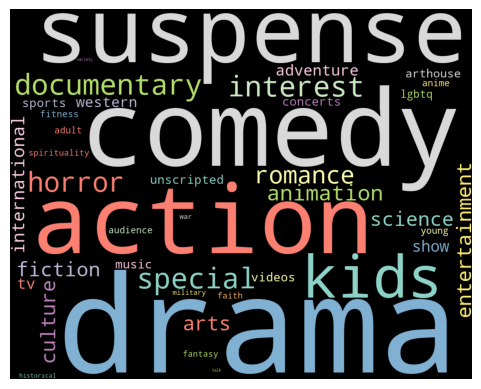

In [79]:
plt.imshow(wordcloud)
plt.axis("off")
     

Insight Gathered: comedy,suspense,drama and action are the most common genres of the movies available on Amazon Prime

C:\Users\rashm\AppData\Local\Temp\ipykernel_16732\1156978935.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = genres_exploded, y = 'genres', order = genres_exploded['genres'].value_counts().index, palette = 'crest_r')


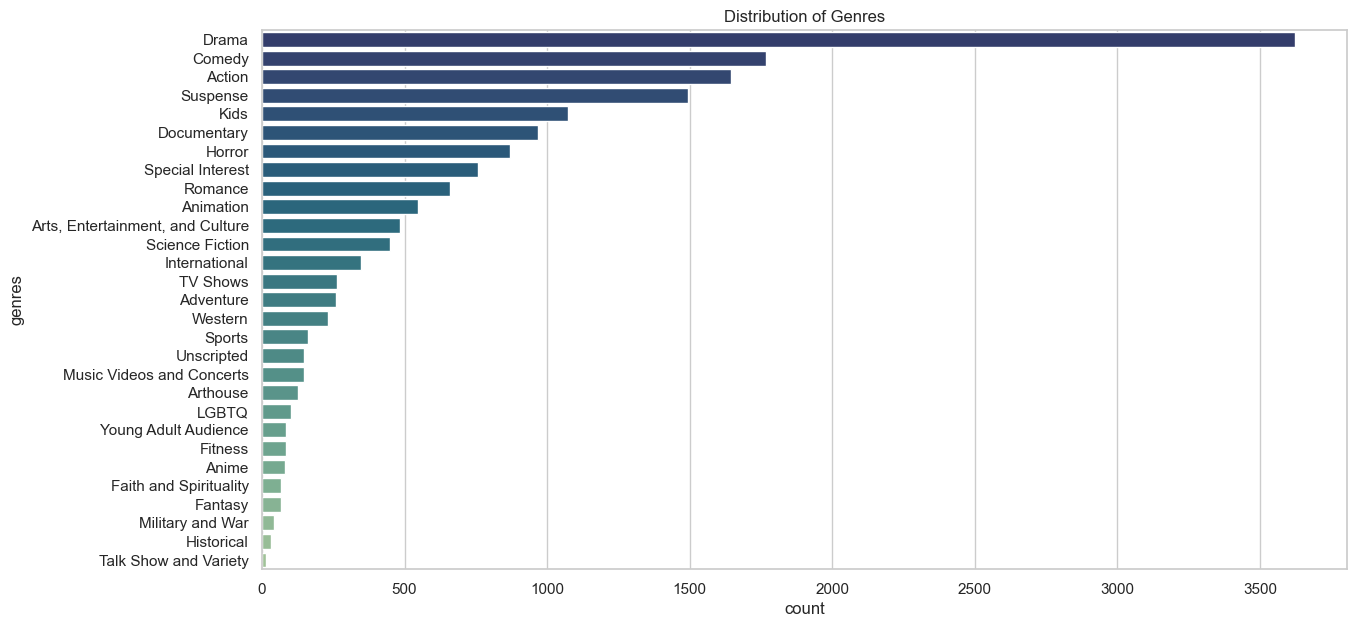

In [115]:
def extract_genres(listed_in):
    if 'Arts, Entertainment, and Culture' in listed_in:
        return ['Arts, Entertainment, and Culture']
    else:
        return [genre.strip() for genre in listed_in.split(',')]

df['genres'] = df['listed_in'].apply(extract_genres)

# Exploding the genres into separate rows
genres_exploded = df.explode('genres')

# Plotting the distribution of genres
plt.figure(figsize = (14, 7))
sns.countplot(data = genres_exploded, y = 'genres', order = genres_exploded['genres'].value_counts().index, palette = 'crest_r')
plt.title('Distribution of Genres')
plt.show()

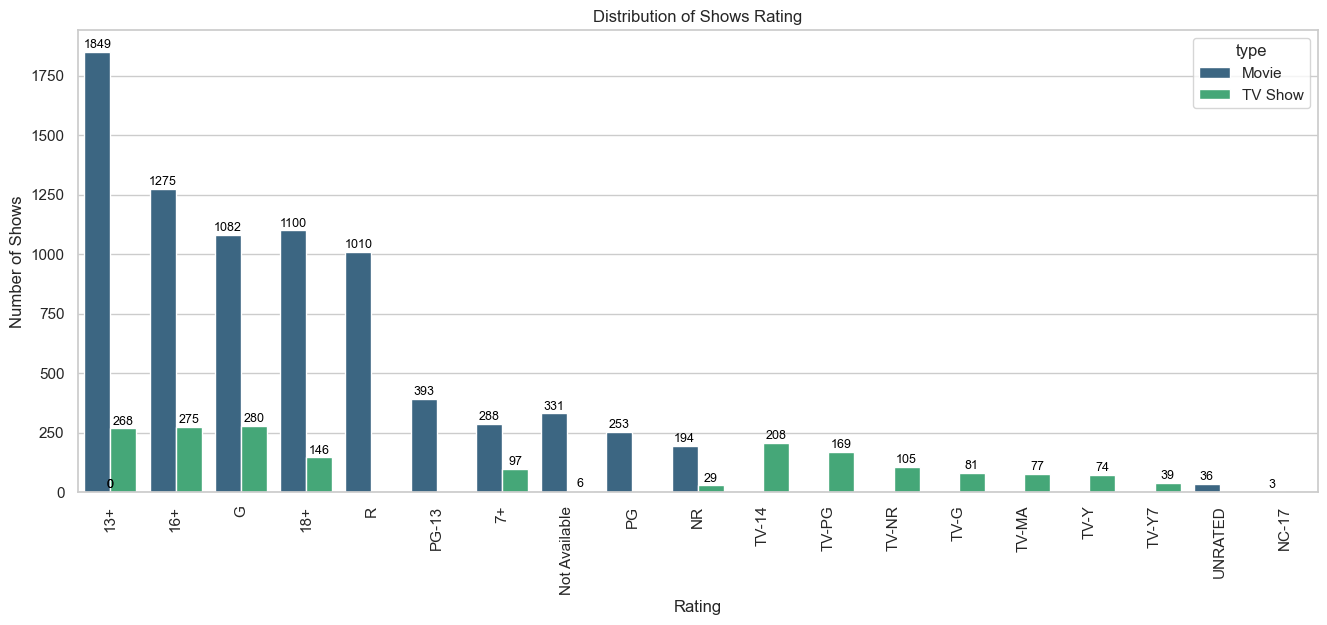

In [117]:
df['rating'] = df['rating'].replace({
    'ALL': 'G',
    'AGES_18_': '18+',
    'AGES_16_': '16+',
    '16' : '16+',
    'ALL_AGES': 'G',
    'NOT_RATE': 'UNRATED'
})

# Plotting the distribution of Shows Rating
plt.figure(figsize = (16,6))
sns.countplot(x='rating', data = df, hue = 'type', order = df['rating'].value_counts().index, palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Distribution of Shows Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

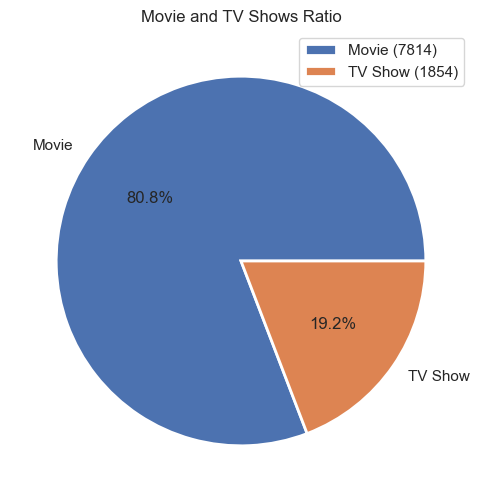

In [121]:
df_pie = df['type'].copy().value_counts()
plt.figure(figsize=(7,6))
plt.pie(
    x=df_pie.values,labels=df_pie.index,autopct='%.1f%%',
    wedgeprops={'linewidth':2.0,'edgecolor':'white'}
    )
plt.title('Movie and TV Shows Ratio')
plt.legend(labels=[f"{label} ({count})" for label, count in zip(df_pie.index, df_pie.values)],loc='best')
plt.show()

In [126]:
country_content = df['country'].value_counts()
print("Top Content Producing Countries:\n", country_content.head(10))

Top Content Producing Countries:
 country
Not Available                    8996
United States                     253
India                             229
United Kingdom                     28
Canada                             16
United Kingdom, United States      12
Spain                               8
Italy                               8
Canada, United States               7
United States, United Kingdom       6
Name: count, dtype: int64


In [95]:
country_content = df['country'].value_counts().head(10)
top_countries = country_content.reset_index()
top_countries.columns = ['Country', 'Content Count']

C:\Users\rashm\AppData\Local\Temp\ipykernel_16732\907137727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Country', y='Content Count', palette='viridis')


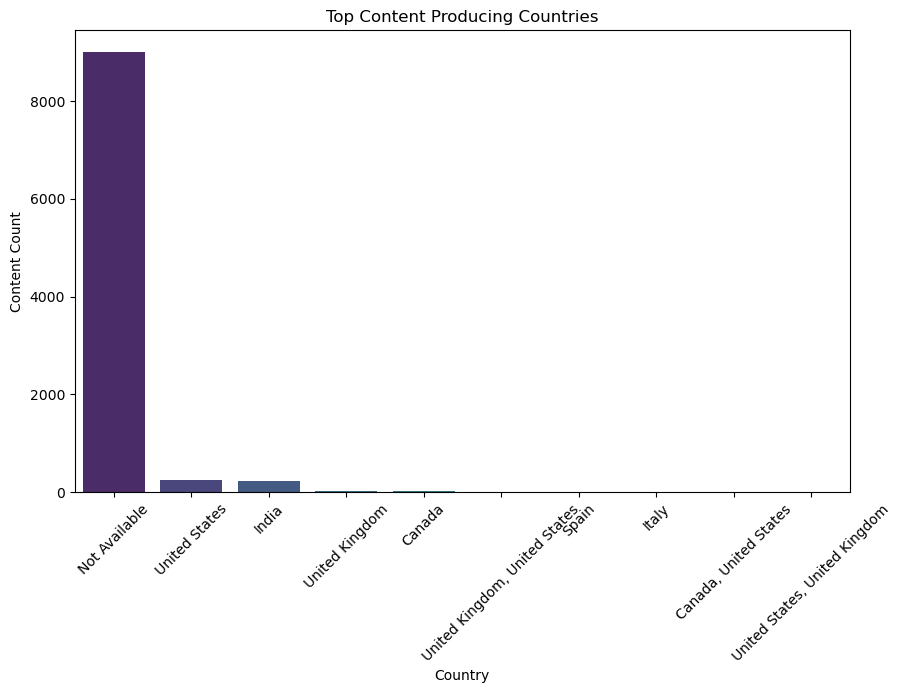

In [97]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Country', y='Content Count', palette='viridis')

# Customize the plot
plt.title('Top Content Producing Countries')
plt.xlabel('Country')
plt.ylabel('Content Count')
plt.xticks(rotation=45)
plt.show()

How much Movies & TV shows have releases over years on the Amazon Prime 

Text(0.5, 1.0, 'Distribution of Movies/ TV Shows Releases over years')

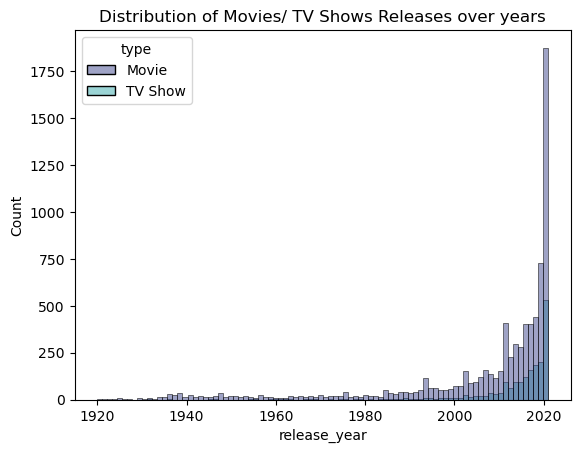

In [91]:
sns.histplot(x='release_year',hue='type',data=df,palette="mako")
plt.title("Distribution of Movies/ TV Shows Releases over years")

Insight: Over the last few years, the number of movies and television shows has grown exponentially. In Amazon Prime, a majority of the content is movies and TV shows released between 2020 and 2021.
